In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread,imshow
from skimage.transform import resize
import random
from skimage import color
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


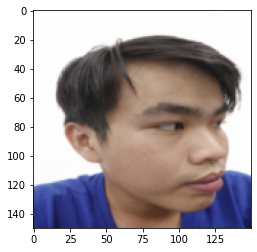

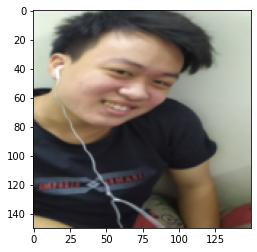

In [6]:
datadir = '/content/drive/MyDrive/image'
folder = ['Thieu','nhan']

for file in folder:
  path = os.path.join(datadir,file)
  for picture in os.listdir(path):
    image = imread(os.path.join(path,picture))
    img = resize(image,(150,150))
    plt.imshow(img)
    plt.show()
    break
    break

In [7]:
train_data = []

def fnc_train_data():
  for file in folder:
    path = os.path.join(datadir,file)
    classname = folder.index(file)
    for picture in os.listdir(path):
      image = imread(os.path.join(path,picture))
      img = resize(image,(150,150))
      train_data.append([img,classname])  

fnc_train_data()

In [8]:
X = []
y = []

for features, label in train_data:
  X.append(features)
  y.append(label)

X = np.array(X)
y = np.array(y)

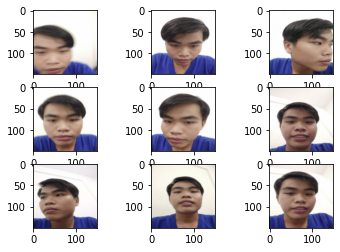

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])

x_train = color.rgb2gray(x_train)
x_test = color.rgb2gray(x_test)

In [11]:
x_test.shape

(15, 150, 150)

In [12]:
x_train.shape

(32, 150, 150)

In [13]:
x_test = x_test.reshape(15,22500)
x_train = x_train.reshape(32,22500) 

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/= 255.0 
x_test/= 255.0

y_train = to_categorical(y_train) 
y_test = to_categorical(y_test)

In [14]:
# Model ANN
model = Sequential()
model.add(Dense(512, activation ='relu', input_shape = (22500,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation = 'softmax')) # => Output
model.add(Dropout(0.2))

In [16]:
model.summary()
model.compile( loss='binary_crossentropy', optimizer = RMSprop(), metrics = ['accuracy']) 
history = model.fit(x_train, y_train, batch_size = 64, epochs = 300, verbose = 1, validation_data = (x_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               11520512  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 1026      
                                                                 
 dropout_2 (Dropout)         (None, 2)                 0         
                                                                 
Total params: 11,784,194
Trainable params: 11,784,194
No

In [17]:
model.save('Myface.h5')
score = model.evaluate(x_test, y_test, verbose = 1)


1/1 [==============================] - 0s 93ms/step - loss: 0.0601 - accuracy: 0.9333


'Me'

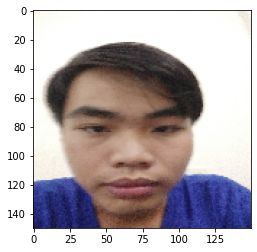

In [18]:
classes = ['Me','Not Me']

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

filename = 'thieu.jpg'

img = load_img(filename, target_size =(150,150))
plt.imshow(img)
img = img_to_array(img)
img = color.rgb2gray(img)
img = img.reshape(1,22500)

label = int(np.argmax(model.predict(img), axis = 1))
classes[label]

'Not Me'

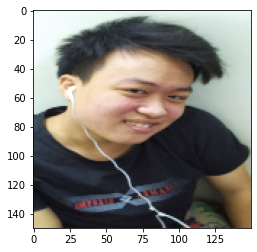

In [20]:
classes = ['Me','Not Me']

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

filename = 'nhan1.jpg'

img = load_img(filename, target_size =(150,150))
plt.imshow(img)
img = img_to_array(img)
img = color.rgb2gray(img)
img = img.reshape(1,22500)

label = int(np.argmax(model.predict(img), axis = 1))
classes[label]